DATA CLEANING 

## Data Cleaning
- Checked for missing values
- Merged transaction and response datasets
- Converted data types where needed


In [2]:
import pandas as pd 

In [3]:
trnx=pd.read_csv('Retail_Data_transactions.csv')
trnx

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [4]:
response=pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [5]:
# merging tables 
df=trnx.merge(response,on="customer_id",how='left')
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [34]:
#features 
df.dtypes
df.shape
df.tail()
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0


In [6]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [7]:
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [8]:
31/125000 *100

0.024800000000000003

In [9]:
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [45]:
# change dtypes
df['trans_date']=pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype("int64")



In [28]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [10]:
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [12]:
from scipy import stats
import numpy as np

#cal z score
z_score=np.abs(stats.zscore(df['response']))

#set a thershold
threshold=3
outliers=z_score>threshold

print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


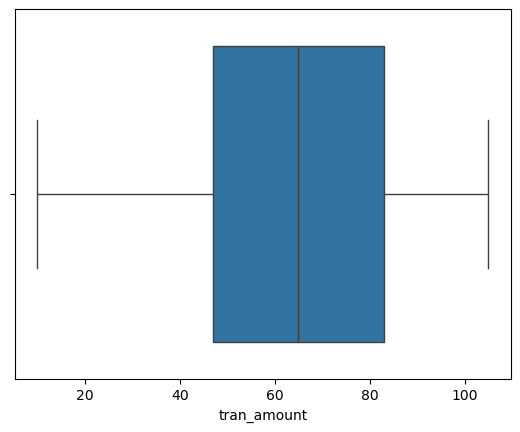

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

DATA PREPARATION

In [48]:
# creating a new columns
df['month']=df['trans_date'].dt.month
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [56]:
# which 5 months have had the highest transaction amount?

monthly_Sales=df.groupby('month')['tran_amount'].sum()
monthly_Sales=monthly_Sales.sort_values(ascending=False).reset_index().head(5)
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089
3,7,717011
4,12,709795


In [63]:
# customers having highest num of orders 
customer_counts=df['customer_id'].value_counts().reset_index()
customer_counts

#sort
top_5cust=customer_counts.sort_values(by='count',ascending=False).head(5)
top_5cust

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
4,CS1215,35
3,CS3805,35


<Axes: xlabel='customer_id', ylabel='count'>

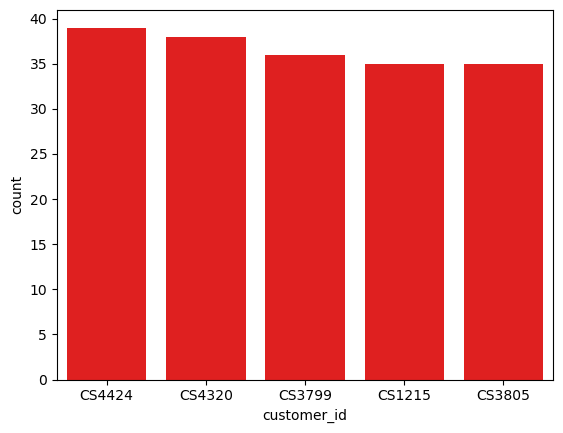

In [67]:
sns.barplot(x="customer_id",y="count",data=top_5cust,color="red")

In [70]:
# customers having highest value of orders 
customer_sales=df.groupby('customer_id')["tran_amount"].sum().reset_index()
customer_sales
#sort
top_5sales=customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_5sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

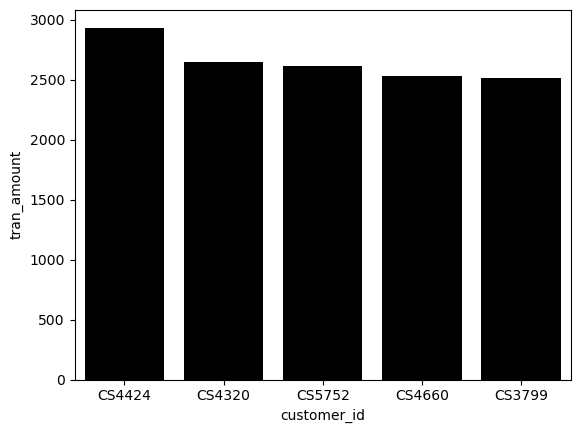

In [72]:
sns.barplot(x="customer_id",y="tran_amount",data=top_5sales,color="black")

time series analysis

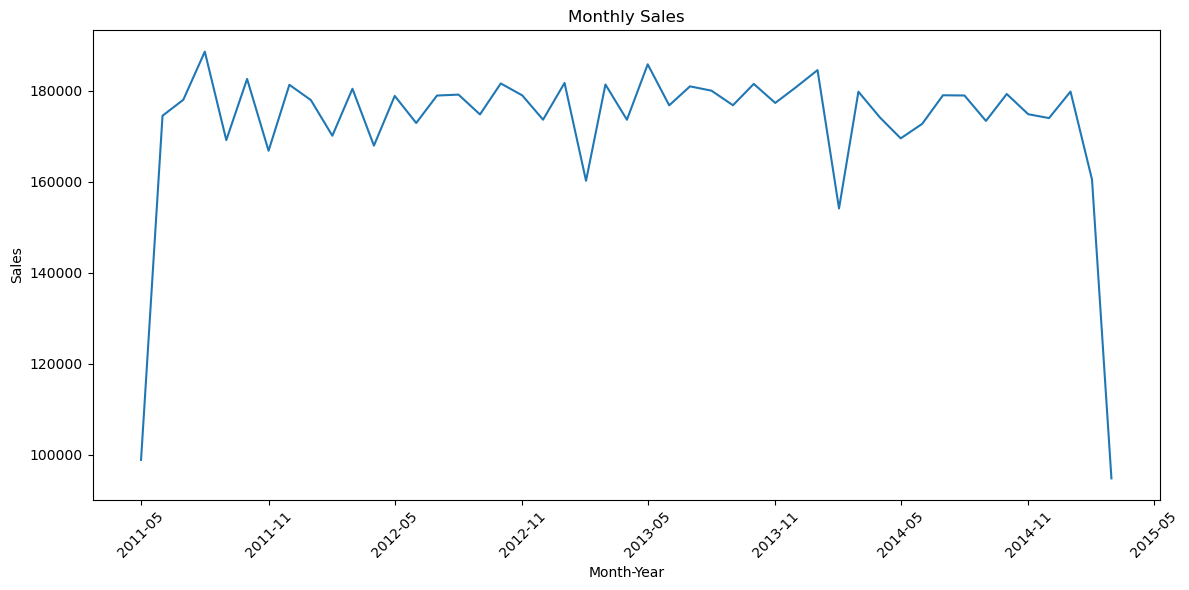

In [75]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['month_year'] = df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.title("Monthly Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Results and Visualizations

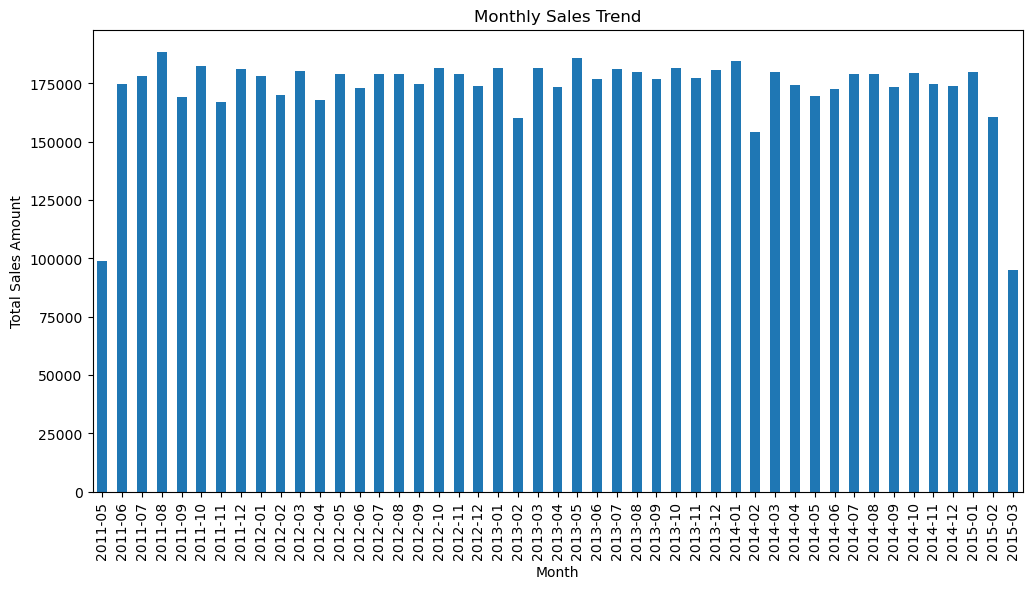

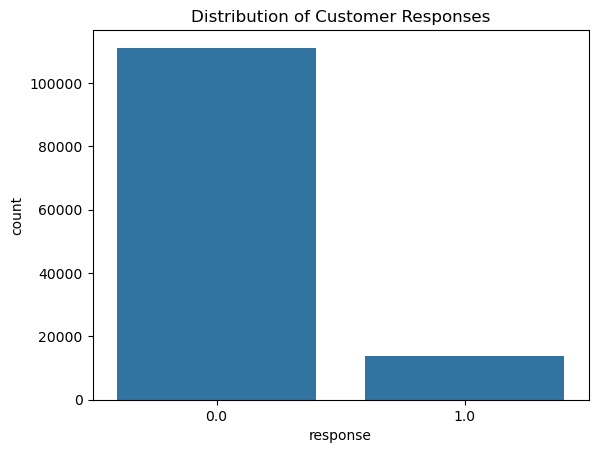

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Group sales by month
monthly_sales = df.groupby(df['trans_date'].dt.to_period("M"))['tran_amount'].sum()

# Plot
monthly_sales.plot(kind='bar', figsize=(12,6))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.show()

# Customer Response Distribution
sns.countplot(data=df, x="response")
plt.title("Distribution of Customer Responses")
plt.show()



cohort segmentation 

In [80]:
# Recency: days since last purchase
recency = df.groupby('customer_id')['trans_date'].max()

# Frequency: number of transactions
frequency = df.groupby('customer_id')['trans_date'].count()

# Monetary: sum of transaction amounts (use 'tran_amount' instead of 'trans_date')
monetory = df.groupby('customer_id')['tran_amount'].sum()

# Combine into RFM DataFrame
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetory': monetory})
rfm


,recency,frequency,monetory
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [82]:
# customer segmentation
def segment_customer(row):
    if (row['recency'] .year>=2012) and row['frequency']>=15 and (row['monetory'] > 1000):
        return "P0"
    elif (2011 <=row['recency'] .year<2012) and (row<=['frequency'] < 15) and (500 <=row['monetory'] <= 1000):
        return "P1"
    else:
        return "P2"

rfm['segment'] = rfm.apply(segment_customer, axis=1)

rfm


,recency,frequency,monetory,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


churn analysis

<Axes: xlabel='response'>

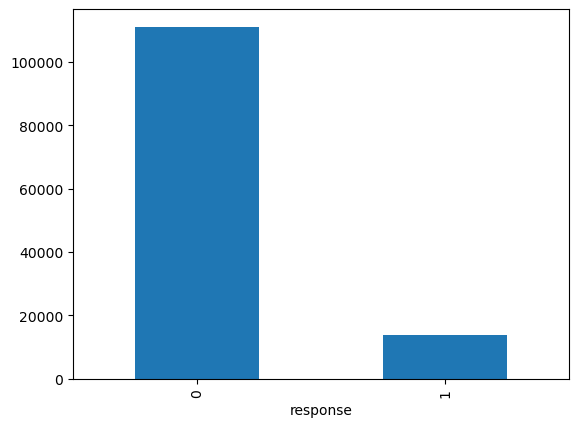

In [83]:
# count the numbers of churned and active customers 
churn_counts=df['response'].value_counts()

#plotting
churn_counts.plot(kind = 'bar')

Analyzing top customers

<Axes: xlabel='month_year'>

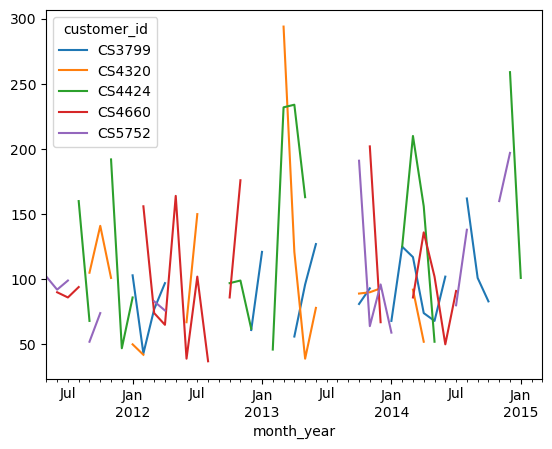

In [88]:
top_5cust = monetory.sort_values(ascending=False).head(5).index
top_5cust_df = df[df['customer_id'].isin(top_5cust)]

top_customer_sales = top_5cust_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')


In [93]:
df.to_excel('Maindata.xlsx')

In [95]:
rfm.to_excel("AddAnlys.xlsx")